# Automatic Text Summarisation


Text summarisation is a useful tool for various text applications that aims to highlight important information within a large corpus. Automatic Text Summarisation is a method that allows individuals to achieve a breakthrough in productivity by reducing the massive volume of information they encounter daily. This method not only allows people to reduce the amount of reading they need to do, but it also allows them to read and comprehend literary pieces efficiently.

Text summarisation is an NLP technique that extracts text from a large amount of data. It helps in creating a shorter version of the large text available. With the outburst of information on the web, text summarisation helps to extract useful information.

**Why text summarisation ?**
1. Text summarisation reduces the reading time
2. Makes selection process much easier
3. Improves effectiveness of indexing
4. Autometic text summarisation is less bias than humans
5. With the Autometic text summarisation, the number of documents to be proceeded increases

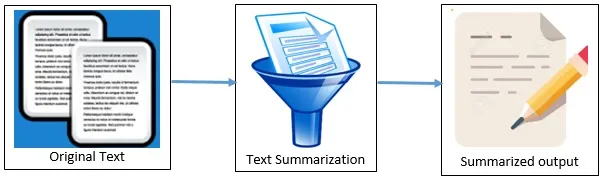

**How text summarisation works**

In general there are two types of summarization, abstractive and extractive summarization.

1. **Extractive Summarisation**
In Extractive Summarisation, we identify essential phrases or sentences from the original text and extract only these phrases from the text. These extracted sentences would be the summary.


2. **Abstractive Summarisation**
We work on generating new sentences from the original text in the Abstractive Summarisation approach. The abstractive method contrasts the approach described above, and the sentences generated through this approach might not even be present in the original text.

We are going to focus on using extractive methods. This method functions by identifying meaningful sentences or excerpts from the text and reproducing them as part of the summary. In this approach, no new text is generated; only the existing text is used in the summarisation process. 

***

Here is our flow to generate summarise text:

**Input article** → **split into sentences** → **remove stop words** → **build a similarity matrix** → **generate rank based on matrix** → **pick top N sentences for summary**

***

## Import Libraries and Data

~~~ Python
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
~~~

## Preprocessing

In this function, we will read in a text file/article, extract all the sentences and perform simple cleaning.

~~~ Python
def read_article(file_name):
    file = open(file_name, "r")
    filedata = file.readlines()
    article = filedata[0].split(". ")
    sentences = []
    
    for sentence in article: 
        print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    
    return sentences
~~~


## Similarity Matrix

In this function, we will be using **cosine similarity** to find similarity between sentences. 

**Cosine similarity** is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Since we will be representing our sentences as the bunch of vectors, we can use it to find the similarity among sentences. Its measures cosine of the angle between vectors. Angle will be 0 if sentences are similar. More information on cosine similarity: https://www.geeksforgeeks.org/cosine-similarity/

~~~ Python
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)


def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)
    
    return similarity_matrix
~~~

## Generate Summary Method

This function will call all other helper function as summarisation pipeline. We will use the **TextRank** algorithm to rank sentences in the similarity matrix. 

**TextRank Algorithm**

TextRank is an unsupervised extractive text summarising approach similar to Google's PageRank algorithm (https://en.wikipedia.org/wiki/PageRank). It helps with keyword extraction, automatic summarisation, and phrase ranking. 

The TextRank algorithm is quite similar to the PageRank algorithm in many ways, such as:

- TextRank works with sentences, whereas PageRank works with web pages
- The probability of a web page transition is calculated in the PageRank algorithm, whereas the TextRank algorithm works by comparing the similarity of any two sentences
- The TextRank approach stores the similarity scores in a square matrix, identical to the M matrix used for the PageRank approach

~~~ Python
def generate_summary(file_name, top_n=5):
    stop_words = stopwords.words('english')
    summarize_text = []
    
    # Step 1 - Read text and tokenize
    sentences =  read_article(file_name)
    
    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)
    
    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)
    
    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    print("Indexes of top ranked_sentence order are ", ranked_sentence)
    
    for i in range(top_n):
        summarize_text.append(" ".join(ranked_sentence[i][1]))
    
    # Step 5 - Offcourse, output the summarize texr
    print("Summarize Text: \n", ". ".join(summarize_text))
~~~

## Let's look at it in action

Using th complete text from an article titled **Microsoft Launches Intelligent Cloud Hub To Upskill Students In AI & Cloud Technologies**, let's passed the article **msft.txt** into the <mark>generate_summary</mark> function to summarise the article into 2 sentences.

~~~ Python
generate_summary( "msft.txt", 2)
~~~

As you can see, it does a pretty good job. 

In this practical, we have used textrank as an approach to rank the sentences. TextRank does not rely on any previous training data and can work with any arbitrary piece of text. It is a general purpose graph-based ranking algorithm for NLP.

There are much-advanced techniques available for text summarisation.
- Text summarisation using RNNs and LSTM
- Text summarisation using Reinforcement Learning
- Text summarisation using Generative Adversarial Networks (GANs)